In [3]:
# 1. Load libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [4]:
# 2. Load dataset
df = pd.read_csv("cleaned_hour_no_outliers.csv")

In [5]:
# 3. Preprocessing
df = df.drop(['instant', 'dteday','yr', 'casual', 'registered'], axis=1)

In [6]:
# Define features and target
X = df.drop('cnt', axis=1)
y = df['cnt']

In [7]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
scaler=joblib.load('scaler.pkl')
model=joblib.load('model_before_FS.pkl')


In [43]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [45]:
y_pred=model.predict(X_test)

In [47]:
# 6. Feature Selection with RFE
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:", list(selected_features))



Selected Features by RFE: ['season', 'hr', 'workingday', 'weathersit', 'temp']


In [48]:
# Retrain with selected features
X_train_sel = X_train[:, rfe.support_]
X_test_sel = X_test[:, rfe.support_]

model.fit(X_train_sel, y_train)
y_pred_sel = model.predict(X_test_sel)

print("\nRetrained Model Performance with Selected Features:")
print("R2 Score:", r2_score(y_test, y_pred_sel))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_sel)))


Retrained Model Performance with Selected Features:
R2 Score: 0.8391680390450837
RMSE: 67.62740739082301


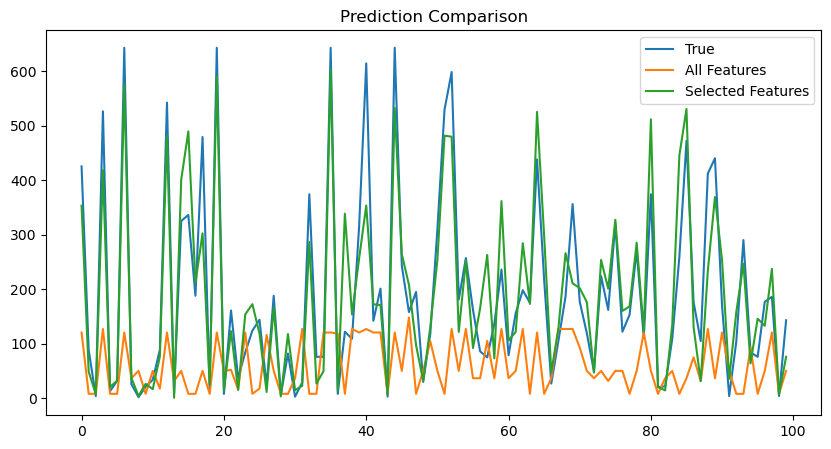

In [49]:
# 7. Comparison Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='True')
plt.plot(y_pred[:100], label='All Features')
plt.plot(y_pred_sel[:100], label='Selected Features')
plt.legend()
plt.title("Prediction Comparison")
plt.show()


In [52]:
joblib.dump(model, 'Final_Project_Model.pkl')

['Final_Project_Model.pkl']

In [55]:
joblib.dump(list(selected_features), 'selected_features.pkl')

['selected_features.pkl']